<a href="https://colab.research.google.com/github/waghvaishnav/Machine-Learning-Algorithms-and-Data-Processing-Playground-hub/blob/main/Food_Time_Prediction_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project objective  :

 The goal is to predict food delivery times based on customer location, restaurant location, weather, traffic, and other factors. This involves both data preprocessing and building predictive models using linear regression and logistic regression.


In [8]:
import pandas as pd              #loading dataset.
from google.colab import files
files.upload()

Saving Food_Delivery_Time_Prediction.csv to Food_Delivery_Time_Prediction.csv


{'Food_Delivery_Time_Prediction.csv': b'Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount\r\nORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.1,81.54\r\nORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02\r\nORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17\r\nORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23\r\nORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34\r\nORD0006,"(15.560205, 80.59125)","(12.478068, 78.823965)",10.0,Rainy,High,10,Medium,Evening,Bicycle,2.

In [9]:
df = pd.read_csv("Food_Delivery_Time_Prediction.csv")          #creating dataframe using pandas.

In [10]:
df

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",23.82,Cloudy,High,8,Medium,Night,Bike,4.7,4.0,50.39,1432.26,66.34
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",6.09,Snowy,Medium,8,Low,Night,Bicycle,3.0,3.6,90.54,1720.25,40.27
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",20.61,Snowy,High,4,Medium,Afternoon,Bike,2.9,3.4,73.20,1356.58,5.10
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",24.06,Rainy,High,9,Low,Night,Car,3.9,4.8,53.94,354.39,85.25


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Order_ID                    200 non-null    object 
 1   Customer_Location           200 non-null    object 
 2   Restaurant_Location         200 non-null    object 
 3   Distance                    200 non-null    float64
 4   Weather_Conditions          200 non-null    object 
 5   Traffic_Conditions          200 non-null    object 
 6   Delivery_Person_Experience  200 non-null    int64  
 7   Order_Priority              200 non-null    object 
 8   Order_Time                  200 non-null    object 
 9   Vehicle_Type                200 non-null    object 
 10  Restaurant_Rating           200 non-null    float64
 11  Customer_Rating             200 non-null    float64
 12  Delivery_Time               200 non-null    float64
 13  Order_Cost                  200 non

In [12]:
df.describe()

,Distance,Delivery_Person_Experience,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.498050,5.250000,3.738500,3.686500,70.494950,1046.488700,46.616650
std,6.841755,2.745027,0.703021,0.697063,29.830694,548.568922,29.361706
min,0.520000,1.000000,2.500000,2.600000,15.230000,122.300000,1.240000
25%,6.090000,3.000000,3.200000,3.100000,46.997500,553.270000,21.602500
50%,10.265000,5.000000,3.800000,3.700000,72.775000,1035.950000,47.530000
75%,16.497500,8.000000,4.300000,4.300000,96.650000,1543.125000,70.245000
max,24.900000,10.000000,5.000000,5.000000,119.670000,1997.420000,99.740000


In [13]:
df.isnull().sum()

,0
Order_ID,0
Customer_Location,0
Restaurant_Location,0
Distance,0
Weather_Conditions,0
Traffic_Conditions,0
Delivery_Person_Experience,0
Order_Priority,0
Order_Time,0
Vehicle_Type,0


In [14]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [15]:
from sklearn.preprocessing import StandardScaler              #standardscaler
sc = StandardScaler()

df['Distance']= sc.fit_transform(df[['Distance']])
df['Delivery_Time'] = sc.fit_transform(df[['Delivery_Time']])
df['Order_Cost'] = sc.fit_transform(df[['Order_Cost']])
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,-1.487932,0.501852,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,-0.264987,-1.634294,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,Snowy,Medium,9,High,Night,Bike,3.3,3.4,-0.741529,1.092646,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,1.382411,-0.923323,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,Rainy,High,6,Low,Night,Bike,3.5,2.8,-1.280915,-0.779755,2.34


In [16]:
#Weather Conditions, Traffic Conditions, Vehicle Type.
df = pd.get_dummies(df,columns=['Weather_Conditions'],prefix="Weather")


In [17]:
df['Weather_Cloudy'] =df['Weather_Cloudy'].astype(int)
df['Weather_Rainy']=df['Weather_Rainy'].astype(int)
df['Weather_Snowy']=df['Weather_Snowy'].astype(int)
df['Weather_Sunny'] = df['Weather_Sunny'].astype(int)

In [18]:
df = pd.get_dummies(df,columns=['Traffic_Conditions','Vehicle_Type'],prefix=["Traffic","Vehicle"])
df['Traffic_High']=df['Traffic_High'].astype(int)
df['Traffic_Low']=df['Traffic_Low'].astype(int)
df['Traffic_Medium']=df['Traffic_Medium'].astype(int)
df['Vehicle_Bicycle']=df['Vehicle_Bicycle'].astype(int)
df['Vehicle_Bike']=df['Vehicle_Bike'].astype(int)
df['Vehicle_Car']=df['Vehicle_Car'].astype(int)

In [19]:
df = pd.get_dummies(df,columns=['Order_Priority'],prefix=["Order"])
df['Order_High'] = df['Order_High'].astype(int)
df['Order_Low'] = df['Order_Low'].astype(int)
df['Order_Medium'] = df['Order_Medium'].astype(int)

In [20]:
x = df[["Distance","Traffic_High","Traffic_Low","Traffic_Medium","Order_High","Order_Low","Order_Medium"]]
x
y = df['Delivery_Time']

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [22]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (160, 7)
X_test shape: (40, 7)
y_train shape: (160,)
y_test shape: (40,)


In [23]:
print("X_train shape:", x_train)
print("X_test shape:", x_test)
print("y_train shape:", y_train)
print("y_test shape:", y_test)

X_train shape:      Distance  Traffic_High  Traffic_Low  ...  Order_High  Order_Low  Order_Medium
79   1.869984             1            0  ...           1          0             0
197  1.335157             1            0  ...           0          0             1
38  -0.982918             0            1  ...           0          0             1
24  -0.064187             0            0  ...           0          0             1
122 -0.275187             0            0  ...           1          0             0
..        ...           ...          ...  ...         ...        ...           ...
106  1.503664             0            1  ...           1          0             0
14  -0.209249             0            1  ...           0          0             1
92  -1.358030             0            1  ...           0          1             0
179 -0.916980             0            1  ...           1          0             0
102  0.224474             0            0  ...           0          1    

In [24]:
#lineear regression :
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae)
print(mse)
print(r2)

0.8564560901135646
1.0338268513329323
0.010292275231804315


Text(0, 0.5, 'distance')

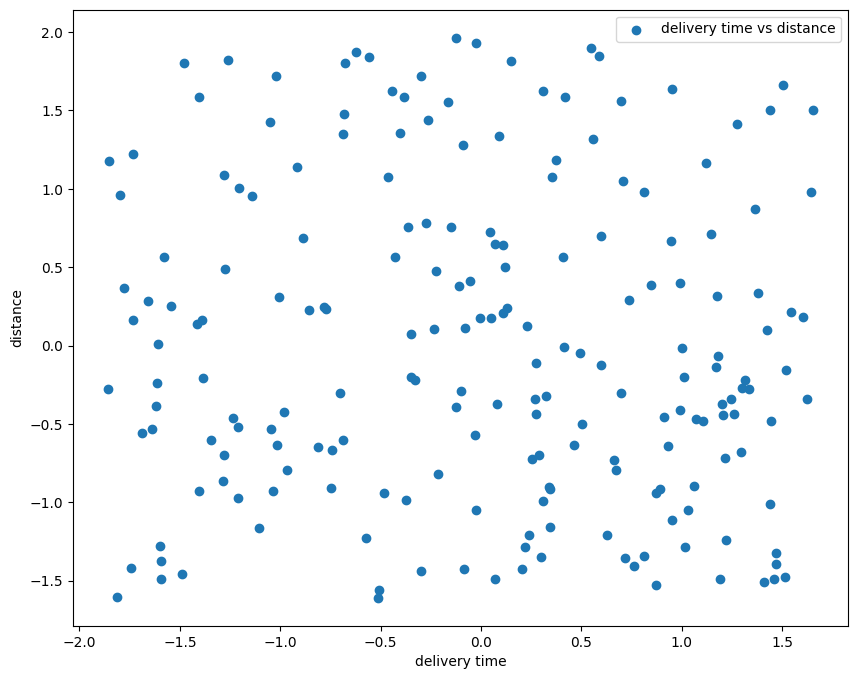

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(df['Delivery_Time'],df['Distance'],marker="o",label="delivery time vs distance")
plt.legend()
plt.xlabel("delivery time")
plt.ylabel("distance")


In [25]:
#logistic regression :

threshold = df['Delivery_Time'].median()
df["Delivery_status"] = (df['Delivery_Time'] > threshold).astype(int)       # 0 fast / 1 delayed .

In [26]:
df

,Order_ID,Customer_Location,Restaurant_Location,Distance,Delivery_Person_Experience,Order_Time,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount,Weather_Cloudy,Weather_Rainy,Weather_Snowy,Weather_Sunny,Traffic_High,Traffic_Low,Traffic_Medium,Vehicle_Bicycle,Vehicle_Bike,Vehicle_Car,Order_High,Order_Low,Order_Medium,Delivery_status
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",-1.454738,4,Afternoon,4.1,3.0,-1.487932,0.501852,81.54,0,1,0,0,0,0,1,0,0,1,0,0,1,0
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",1.439192,8,Night,4.5,4.2,-0.264987,-1.634294,29.02,1,0,0,0,0,0,1,0,0,1,0,1,0,0
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",-0.666417,9,Night,3.3,3.4,-0.741529,1.092646,64.17,0,0,1,0,0,0,1,0,1,0,1,0,0,0
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",0.335835,2,Evening,3.2,3.7,1.382411,-0.923323,79.23,1,0,0,0,0,1,0,0,1,0,0,0,1,1
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",-0.700119,6,Night,3.5,2.8,-1.280915,-0.779755,2.34,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,ORD0196,"(17.910045, 81.56199)","(18.098924, 87.896124)",1.805512,8,Night,4.7,4.0,-0.675660,0.704997,66.34,1,0,0,0,1,0,0,0,1,0,0,0,1,0
196,ORD0197,"(21.66459, 82.226635)","(16.892341, 80.554716)",-0.792431,8,Night,3.0,3.6,0.673647,1.231298,40.27,0,0,1,0,0,0,1,1,0,0,0,1,0,1
197,ORD0198,"(14.575401, 82.55641)","(13.625369, 82.418092)",1.335157,4,Afternoon,2.9,3.4,0.090908,0.566692,5.10,0,0,1,0,1,0,0,0,1,0,0,0,1,1
198,ORD0199,"(12.094497, 82.893369)","(19.135509, 86.659978)",1.840679,9,Night,3.9,4.8,-0.556356,-1.264810,85.25,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

log_reg = LogisticRegression()

x1 = df[["Delivery_Person_Experience","Traffic_High","Traffic_Low","Traffic_Medium"]]
y1 = df['Delivery_status']

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

log_reg.fit(x1_train,y1_train)

y1_prediction = log_reg.predict(x1_test)

print("confusion_matrix",confusion_matrix(y1_test,y1_prediction))
print("accuracy_score",accuracy_score(y1_test,y1_prediction))
print("f1_score",f1_score(y1_test,y1_prediction))
print("precision_score",precision_score(y1_test,y1_prediction))
print("recall score",recall_score(y1_test,y1_prediction))

confusion_matrix [[ 9 10]
 [15  6]]
accuracy_score 0.375
f1_score 0.32432432432432434
precision_score 0.375
recall score 0.2857142857142857


In [35]:
print("                           ********************                                \n               here we have to predict a new prediction.            \n")


distance = float(input("Enter the distance: "))
Traffic_High = int(input('Enter traffic is high [if yes = "1" else enter "0"]: '))
Traffic_Low = int(input('Enter traffic is low [if yes = "1" else enter "0"]: '))
Traffic_Medium = int(input('Enter traffic is medium [if yes = "1" else enter "0"]: '))

Order_High = int(input('Enter order is high [if yes = "1" else enter "0"]: '))
Order_Low = int(input('Enter order is low [if yes = "1" else enter "0"]: '))
Order_Medium = int(input('Enter order is medium [if yes = "1" else enter "0"]: '))

scaled_distance = sc.fit_transform([[distance]])[0][0]

linear_reg_data = pd.DataFrame({
    "Distance": [scaled_distance],
    "Traffic_High": [Traffic_High],
    "Traffic_Low": [Traffic_Low],
    "Traffic_Medium": [Traffic_Medium],
    "Order_High": [Order_High],
    "Order_Low": [Order_Low],
    "Order_Medium": [Order_Medium]
})


new_linear_reg =model.predict(linear_reg_data)


                           ********************                                
               here we have to predict a new prediction.            

Enter the distance: 5.2
Enter traffic is high [if yes = "1" else enter "0"]: 1
Enter traffic is low [if yes = "1" else enter "0"]: 0
Enter traffic is medium [if yes = "1" else enter "0"]: 0
Enter order is high [if yes = "1" else enter "0"]: 0
Enter order is low [if yes = "1" else enter "0"]: 1
Enter order is medium [if yes = "1" else enter "0"]: 0


In [45]:
linear_result=sc.inverse_transform([new_linear_reg])           #for np.reverse_transform need to 2d array.

print("prediction for the related input is ",round(linear_result[0][0],2)," km distance.")

prediction for the related input is  5.14  km distance.


In [55]:
# new prediction for the logistic regression  :
Delivery_Person = input("Enter the experience of the delivery person [1 - 10] : ")


input_data ={
             "Delivery_Person_Experience":[Delivery_Person],
             "Traffic_High" : [Traffic_High],
             "Traffic_Low":[Traffic_Low],
             "Traffic_Medium" : [Traffic_Medium]}

dataframe = pd.DataFrame(input_data)


Enter the experience of the delivery person [1 - 10] : 6.2


In [58]:
log_prediction=log_reg.predict(dataframe)

if log_prediction[0] == 0:
  print("delivery will be \" FAST \" ")
else:
  print("delivery will be SLOW. ")

delivery will be " FAST " 
